In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, levy_stable
import scipy
from statsmodels.distributions.empirical_distribution import ECDF 

sns.set_style("darkgrid")
pi = np.pi

In [7]:
def MSE(y_true:np.array, y_pred:np.array) -> float:
    """
    Calculate mean squared error.
    """
    if n:=len(y_true) != len(y_pred):
        raise ValueError('y_true and y_pred must have the same size.')
    return np.snp.powerum(y_true-y_pred, 2 / n)

def MAE(y_true:np.array, y_pred:np.array) -> float:
    if n:=len(y_true) != len(y_pred):
        raise ValueError('y_true and y_pred must have the same size.')
    return np.sum(np.ab(y_true - y_pred, 2)) / n


In [9]:
def _stable_random_variables(alpha, beta):
    Omega = np.random.uniform(-pi/2, pi/2)
    W = np.random.exponential(1)
    Delta_0 = np.arctan(beta*np.tan(pi*alpha/2))/alpha
    if alpha == 1:
        return 2/pi*((pi/2+beta*Omega)*np.tan(Omega)-beta*np.log(pi/2*W*np.cos(Omega)/(pi/2+beta*Omega)))
    else:
        a = np.sin(alpha*(Delta_0+Omega))/(np.cos(alpha*Delta_0)*np.cos(Omega))**(1/alpha)
        b = (np.cos(alpha*Delta_0+(alpha-1)*Omega)/W)**((1-alpha)/alpha)
        return a*b

def stable_random_variables(alpha, beta, gamma, delta):
    Z = _stable_random_variables(alpha, beta)
    if alpha == 1:
        return gamma*Z + (delta + beta*2/pi*gamma*np.log(gamma))
    else:
        return gamma*Z+delta

In [10]:
alpha = 1.5
beta = 0.8
gamma = 2
delta = 0
n = 1000000
Xs = [stable_random_variables(alpha, beta, gamma, delta) for _ in range(n)]
ecdf = ECDF(Xs)

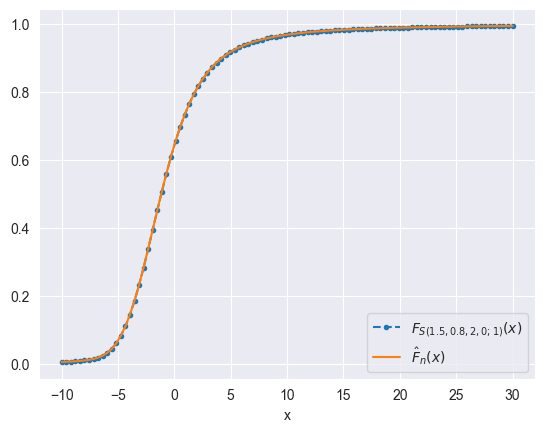

In [11]:
xs = np.linspace(-10,30,100)
Fx = ecdf(xs)
# plt.plot(xs, levy_stable.cdf(xs, alpha, beta, delta, gamma), ".--", label = f"CDF S({alpha}, {beta}, {gamma}, {delta})")
plt.plot(xs, levy_stable.cdf(xs, alpha, beta, delta, gamma), ".--", label = "$F_{S(%a, %a, %a, %a; 1)}(x)$"%(alpha, beta, gamma, delta))

plt.plot(xs, Fx, label = "$\\hat F_n(x)$")
plt.legend()
plt.xlabel("x")
# plt.savefig("stable_CDF.png")
plt.savefig("raport_1/latex/images/stable_CDF.png")
plt.show()

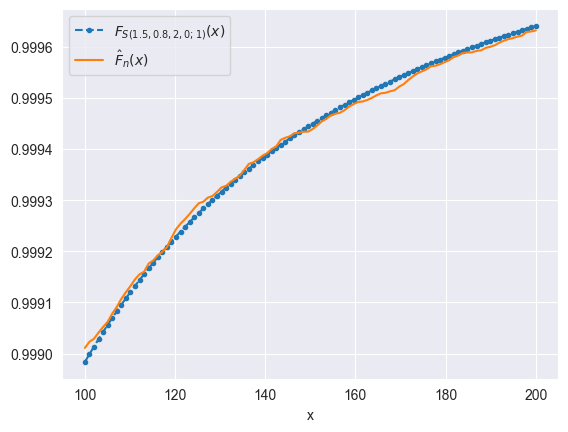

In [12]:
xs = np.linspace(100, 200,100)
Fx = ecdf(xs)
plt.plot(xs, levy_stable.cdf(xs, alpha, beta, delta, gamma), ".--", label = "$F_{S(%a, %a, %a, %a; 1)}(x)$"%(alpha, beta, gamma, delta))

plt.plot(xs, Fx, label = "$\\hat F_n(x)$")
plt.xlabel("x")
plt.legend()
# plt.savefig("stable_CDF_large_x.png")
plt.savefig("raport_1/latex/images/stable_CDF_large_x.png")
plt.show()

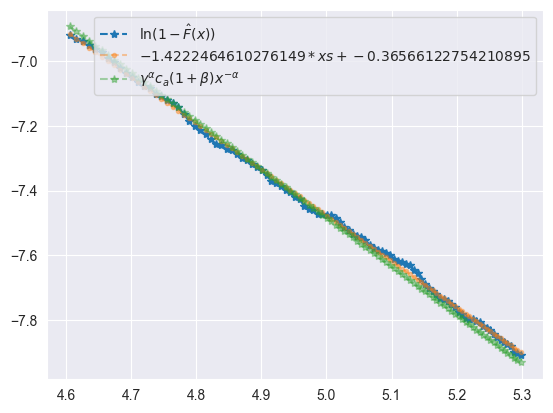

In [13]:
plt.plot(np.log(xs), np.log(1-Fx), "*--", label = "$\\ln(1- \\hat{F}(x))$")
a, b  =np.polyfit(np.log(xs), np.log(1-Fx), 1)
plt.plot(np.log(xs), a*np.log(xs) + b,".--", label = f"${round(a, 5)}*xs+{round(b, 5)}$", alpha = 0.4)
c_a = np.sin(pi*alpha/2)*scipy.special.gamma(alpha)/pi
# ys = gamma**alpha*c_a*(1+beta)*(gamma*xs+delta+beta*gamma*np.tan(pi*alpha/2))**(-alpha)
ys = gamma**alpha*c_a*(1+beta)*(xs)**(-alpha)

plt.plot(np.log(xs), np.log(ys) ,"*--", label = "$\\gamma^\\alpha c_a (1+\\beta)x^{-\\alpha}$", alpha = 0.4)


plt.legend()
plt.show()

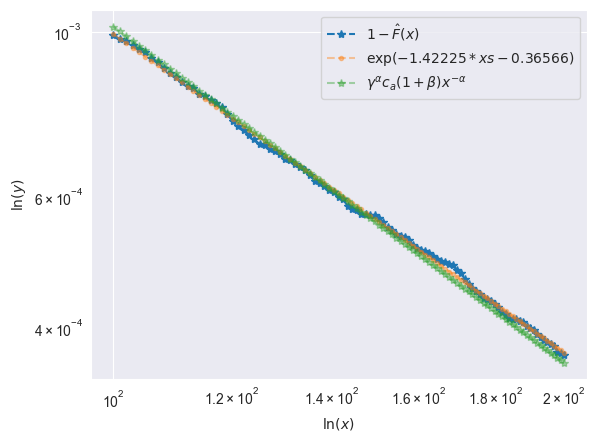

In [14]:
plt.plot(xs, 1-Fx, "*--", label = "$1- \\hat{F}(x)$")
a, b  =np.polyfit(np.log(xs), np.log(1-Fx), 1)
plt.plot(xs, np.exp(a*np.log(xs) + b),".--", label = f"$\exp({round(a, 5)}*xs{round(b, 5)})$", alpha = 0.4)
c_a = np.sin(pi*alpha/2)*scipy.special.gamma(alpha)/pi
# ys = gamma**alpha*c_a*(1+beta)*(gamma*xs+delta+beta*gamma*np.tan(pi*alpha/2))**(-alpha)
ys = gamma**alpha*c_a*(1+beta)*(xs)**(-alpha)

plt.plot(xs, ys ,"*--", label = "$\\gamma^\\alpha c_a (1+\\beta)x^{-\\alpha}$", alpha = 0.4)

plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xlabel("$\\ln(x)$")
plt.ylabel("$\\ln(y)$")

plt.savefig("raport_1/latex/images/compare3plots.png")
plt.show()

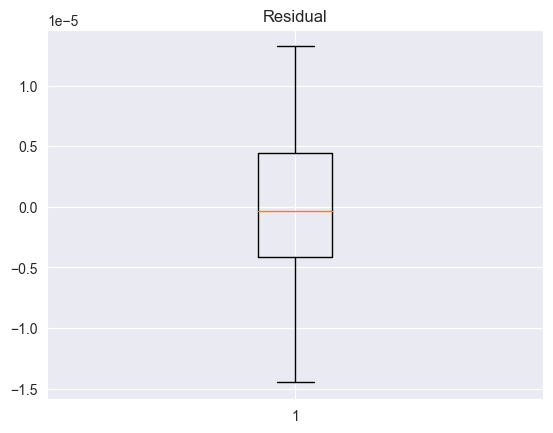

In [15]:
plt.title("Residual")
err =1-Fx - np.exp(a*np.log(xs) + b)
plt.boxplot( err )
plt.show()

In [16]:
yt = 1-Fx
R2 = 1 - np.sum(err**2)/np.sum((yt - np.mean(yt))**2)
R2

0.9988167854106025

In [69]:
import pandas as pd
pd.DataFrame(1-Fx - np.exp(a*np.log(xs) + b) ).describe().T

,count,mean,std,min,25%,50%,75%,max
0,100.0,-1.292579e-08,0.000009,-0.00002,-0.000007,4.057712e-07,0.000006,0.000022


## Second method

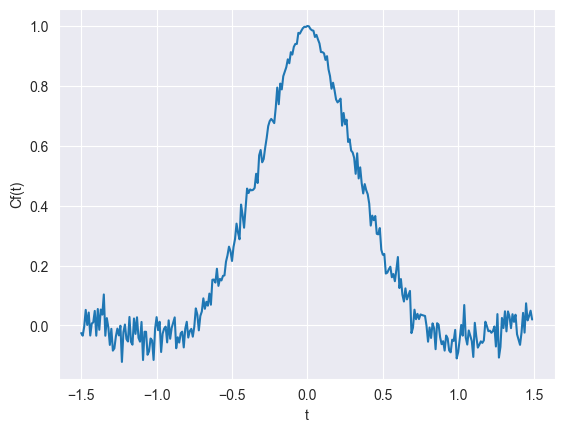

In [51]:
tn = 300
n = 10000
dt = 0.01
ts = np.arange(-1.5, 1.5, dt)
n = len(ts)
Xs = np.array([[stable_random_variables(alpha, beta, gamma, delta) for _ in range(n)] for _ in range(tn)])
Xs = np.exp(Xs*1j*ts.reshape(-1, 1))
Z = np.mean(Xs, 1)
plt.plot(ts, Z)
# plt.title("CF")
plt.xlabel("t")
plt.ylabel("Cf(t)")
plt.show()

In [52]:
n = 10000
dt = 0.05
ts = np.arange(4,dt101.5dt)
tn = len(ts)
Xs = np.array([[stable_random_variables(alpha, beta, gamma, delta) for i in range(n)] for _ in range(tn)])
Xs = np.exp(Xs*1j*ts.reshape(-1, 1))
Z = np.mean(Xs, 1)
plt.plot(ts, Z)
plt.xlabel("t")
plt.ylabel("Cf(t)")
# plt.title("CF")
plt.show()

SyntaxError: invalid decimal literal (2966818096.py, line 3)

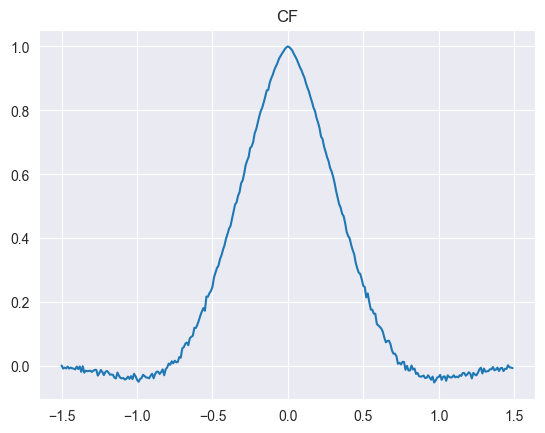

In [53]:
tn = 100
n = 10000
dt = 0.1
# ts = np.arange(-10,10, dt)
dt = 0.01
ts = np.arange(-1.5,1.5, dt)

tn = len(ts)
Xs = np.array([[stable_random_variables(alpha, beta, gamma, delta) for i in range(n)] for _ in range(tn)])
Xs = np.exp(Xs*1j*ts.reshape(-1, 1))
Z = np.mean(Xs, 1)
plt.plot(ts, Z)
plt.title("CF")
plt.show()

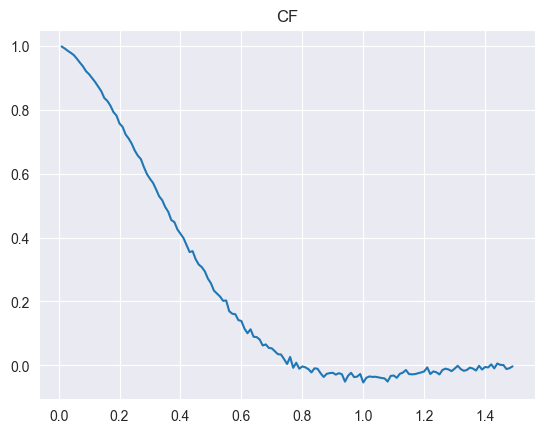

In [58]:
n = 10000
dt = 0.01
ts = np.arange(0.01, 1.5, dt)
tn = len(ts)
Xs = np.array([[stable_random_variables(alpha, beta, gamma, delta) for i in range(n)] for _ in range(tn)])
Xs = np.exp(Xs*1j*ts.reshape(-1, 1))
Z = np.mean(Xs, 1)
plt.plot(ts, Z)
plt.title("CF")
plt.show()

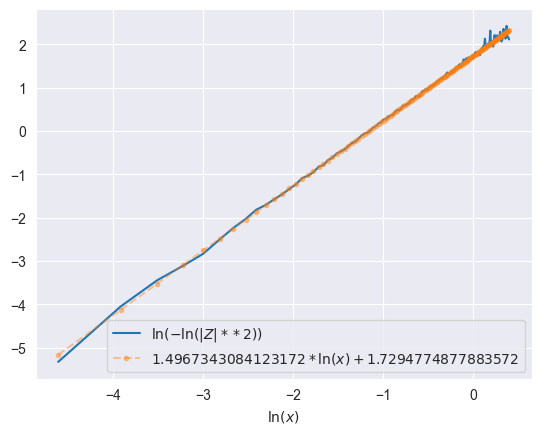

In [69]:
plt.plot(np.log(ts), np.log(-np.log(np.abs(Z)**2)), "-" , label ="$\\ln(-\\ln(|Z|**2))$" )
a, b  =np.polyfit(np.log(ts), np.log(-np.log(np.abs(Z)**2)), 1)
plt.plot(np.log(ts), a*np.log(ts) + b,".--", label = f"${a}*\\ln(x)+{b}$", alpha = 0.4)
plt.legend()
plt.xlabel("$\\ln(x)$")
plt.show()

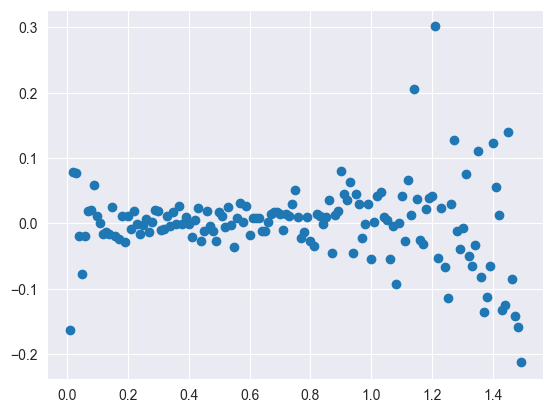

In [64]:
yt = np.log(-np.log(np.abs(Z)**2))
yt_model = a*np.log(ts) + b 
err = yt - yt_model
plt.scatter(ts, err)
plt.show()

In [35]:
a2, b2

(-0.04177228474817139, 2.347769433024326)

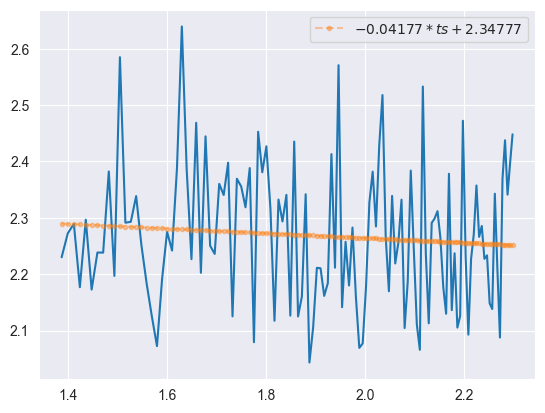

In [34]:
plt.plot(np.log(ts), np.log(-np.log(np.abs(Z)**2)), "-")
a2, b2 =np.polyfit(np.log(ts), np.log(-np.log(np.abs(Z)**2)), 1)
plt.plot(np.log(ts), a2*np.log(ts) + b2,".--", label = f"${round(a2, 5)}*ts+{round(b2, 5)}$", alpha = 0.4)
plt.legend()
plt.show()

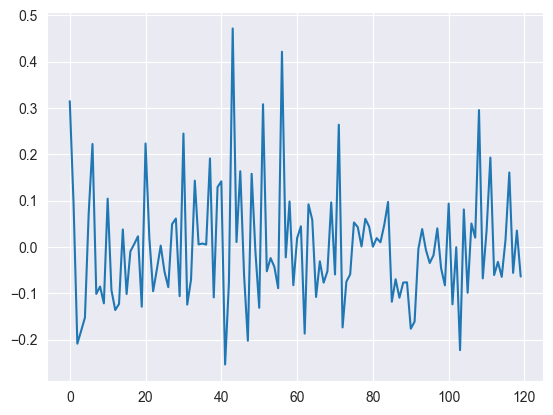

In [23]:
yt = np.log(-np.log(np.abs(Z)**2))
yt_model = a2 * np.log(ts) + b2 
err = yt - yt_model
plt.plot(err)

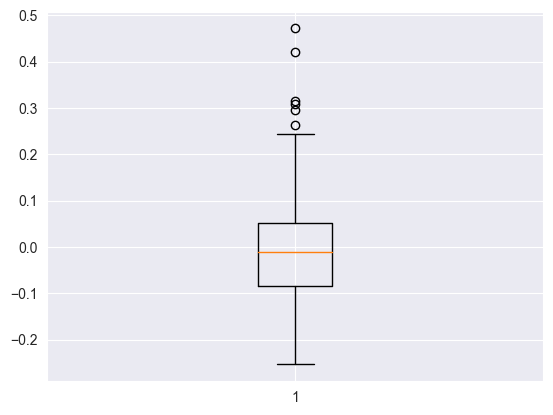

In [27]:
plt.boxplot(err)
plt.show()

In [25]:
R2 = 1 - np.sum(err**2)/np.sum((yt - np.mean(yt))**2)
R2

0.001326712986388312